These are used to customize the behavior when the dataset is loaded into the notebook:

- fifa_filepath - The filepath for the dataset always needs to be provided first.
- index_col="Date" - When we load the dataset, we want each entry in the first column to denote a different row. To do this, we set the value of index_col to the name of the first column ("Date", found in cell A1 of the file when it's opened in Excel).
- parse_dates=True - This tells the notebook to understand the each row label as a date (as opposed to a number or other text with a different meaning).

### Plot the data

In this course, you'll learn about many different plot types. In many cases, you'll only need one line of code to make a chart!

For a sneak peek at what you'll learn, check out the code below that generates a line chart.


Since it's not always easy to decide how to best tell the story behind your data, we've broken the chart types into three broad categories to help with this.

1. - Trends - A trend is defined as a pattern of change.
sns.lineplot - Line charts are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.
2. Relationship - There are many different chart types that you can use to understand relationships between variables in your data.
- sns.barplot - Bar charts are useful for comparing quantities corresponding to different groups.
- sns.heatmap - Heatmaps can be used to find color-coded patterns in tables of numbers.
- sns.scatterplot - Scatter plots show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.
- sns.regplot - Including a regression line in the scatter plot makes it easier to see any linear relationship between two variables.
- sns.lmplot - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.
- sns.swarmplot - Categorical scatter plots show the relationship between a continuous variable and a categorical variable.
3. Distribution - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
- sns.histplot - Histograms show the distribution of a single numerical variable.
- sns.kdeplot - KDE plots (or 2D KDE plots) show an estimated, smooth distribution of a single numerical variable (or two numerical variables).
- sns.jointplot - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.


# Line Charts 

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

# Path of the file to read
spotify_filepath = "/home/maciej/KURSY/Kaggle/pliki_pomoc/spotify.csv"

# Read the file into a variable spotify_data
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)

# Print the first 5 rows of the data
spotify_data.head()

# Print the last five rows of the data
spotify_data.tail()

<AxesSubplot:xlabel='Date'>

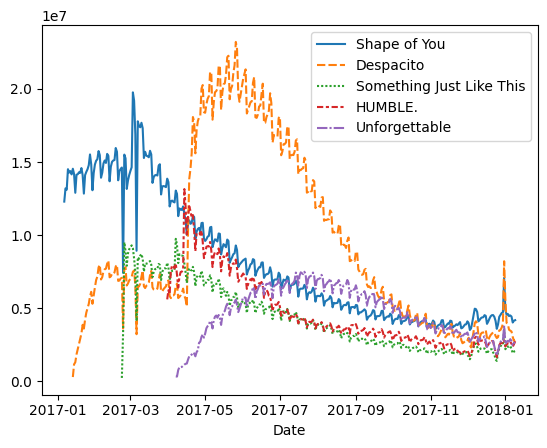

In [15]:
# Line chart showing daily global streams of each song 
sns.lineplot(data=spotify_data)


As you can see above, the line of code is relatively short and has two main components:

- sns.lineplot tells the notebook that we want to create a line chart.
Every command that you learn about in this course will start with sns, which indicates that the command comes from the seaborn package. For instance, we use sns.lineplot to make line charts. Soon, you'll learn that we use sns.barplot and sns.heatmap to make bar charts and heatmaps, respectively.

- data=spotify_data selects the data that will be used to create the chart.


Sometimes there are additional details we'd like to modify, like the size of the figure and the title of the chart. Each of these options can easily be set with a single line of code.

<AxesSubplot:title={'center':'Daily Global Streams of Popular Songs in 2017-2018'}, xlabel='Date'>

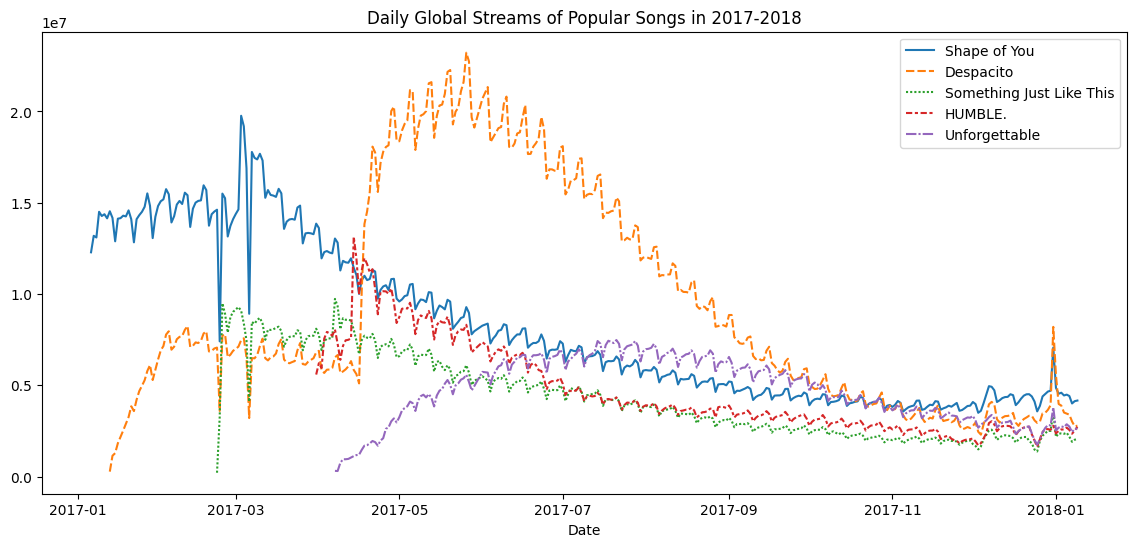

In [16]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of each song 
sns.lineplot(data=spotify_data)


In [17]:
list(spotify_data.columns)


['Shape of You',
 'Despacito',
 'Something Just Like This',
 'HUMBLE.',
 'Unforgettable']

Text(0.5, 0, 'Date')

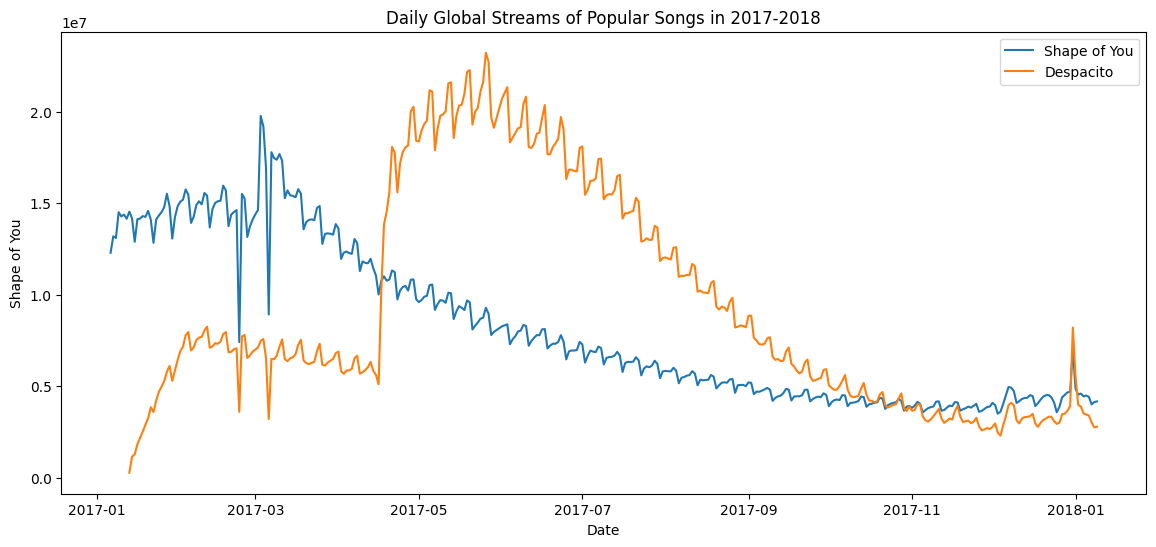

In [28]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=spotify_data['Shape of You'], label="Shape of You")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=spotify_data['Despacito'], label="Despacito")

# Add label for horizontal axis
plt.xlabel("Date")


- Instead of setting data=spotify_data, we set data=spotify_data['Shape of You']. In general, to plot only a single column, we use this format with putting the name of the column in single quotes and enclosing it in square brackets. (To make sure that you correctly specify the name of the column, you can print the list of all column names using the command you learned above.)
- We also add label="Shape of You" to make the line appear in the legend and set its corresponding label.

The final line of code modifies the label for the horizontal axis (or x-axis), where the desired label is placed in quotation marks ("...").

# Bar Charts and Heatmaps

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


Each entry shows the average arrival delay (in minutes) for a different airline and month (all in year 2015). Negative entries denote flights that (on average) tended to arrive early. For instance, the average American Airlines flight (airline code: AA) in January arrived roughly 7 minutes late, and the average Alaska Airlines flight (airline code: AS) in April arrived roughly 3 minutes early.

In [2]:
# Path of the file to read
flight_filepath = "/home/maciej/KURSY/Kaggle/pliki_pomoc/flights.csv"

# Read the file into a variable flight_data
flight_data = pd.read_csv(flight_filepath, index_col="Month")

flight_data.head()


,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


You may notice that the code is slightly shorter than what we used in the previous tutorial. In this case, since the row labels (from the 'Month' column) don't correspond to dates, we don't add parse_dates=True in the parentheses. But, we keep the first two pieces of text as before, to provide both:

the filepath for the dataset (in this case, flight_filepath), and
the name of the column that will be used to index the rows (in this case, index_col="Month").

## Bar chart

Say we'd like to create a bar chart showing the average arrival delay for Spirit Airlines (airline code: NK) flights, by month.

Text(0, 0.5, 'Arrival delay (in minutes)')

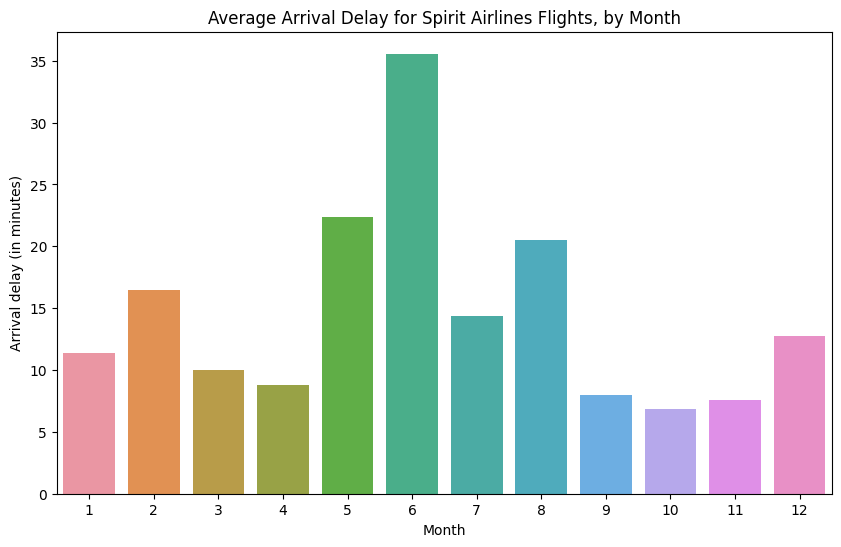

In [30]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

It has three main components:

- sns.barplot - This tells the notebook that we want to create a bar chart.
Remember that sns refers to the seaborn package, and all of the commands that you use to create charts in this course will start with this prefix.
- x=flight_data.index - This determines what to use on the horizontal axis. In this case, we have selected the column that indexes the rows (in this case, the column containing the months).
- y=flight_data['NK'] - This sets the column in the data that will be used to determine the height of each bar. In this case, we select the 'NK' column.

!!! Important Note: You must select the indexing column with flight_data.index, and it is not possible to use flight_data['Month'] (which will return an error). This is because when we loaded the dataset, the "Month" column was used to index the rows. We always have to use this special notation to select the indexing column.

## Heatmap

Text(0.5, 47.7222222222222, 'Airline')

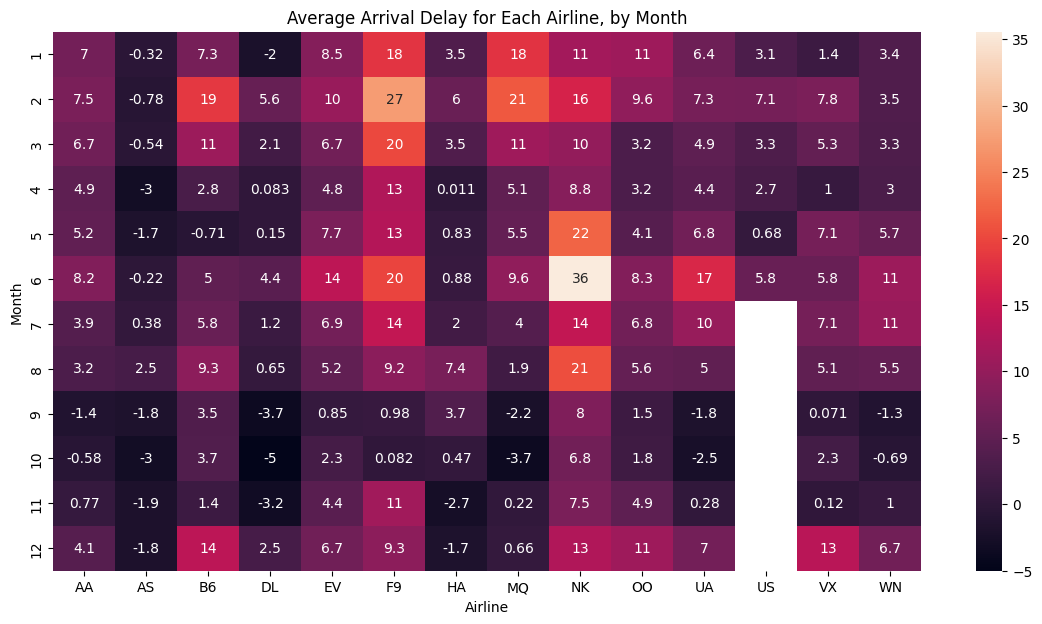

In [3]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)

# Add label for horizontal axis
plt.xlabel("Airline")

This code has three main components:

sns.heatmap - This tells the notebook that we want to create a heatmap.
data=flight_data - This tells the notebook to use all of the entries in flight_data to create the heatmap.
annot=True - This ensures that the values for each cell appear on the chart. (Leaving this out removes the numbers from each of the cells!)
What patterns can you detect in the table? For instance, if you look closely, the months toward the end of the year (especially months 9-11) appear relatively dark for all airlines. This suggests that airlines are better (on average) at keeping schedule during these months!

# Scatter Plots

In [6]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

# Path of the file to read
insurance_filepath = "/home/maciej/KURSY/Kaggle/pliki_pomoc/insurance.csv"

# Read the file into a variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

insurance_data.head()


Setup Complete


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To create a simple scatter plot, we use the sns.scatterplot command and specify the values for:

- the horizontal x-axis (x=insurance_data['bmi']), and
- the vertical y-axis (y=insurance_data['charges']).



<AxesSubplot:xlabel='bmi', ylabel='charges'>

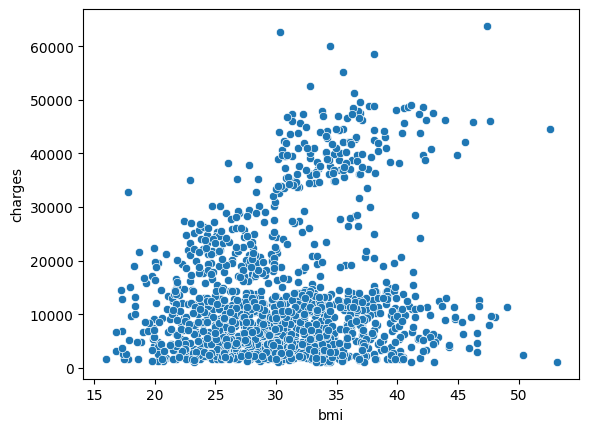

In [9]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

The scatterplot above suggests that body mass index (BMI) and insurance charges are positively correlated, where customers with higher BMI typically also tend to pay more in insurance costs. (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)

To double-check the strength of this relationship, you might like to add a __regression.line__, or the line that best fits the data. We do this by changing the command to sns.regplot.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

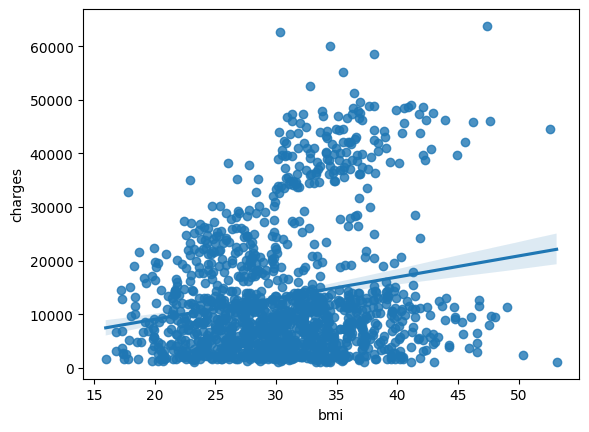

In [10]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

### Color-coded scatter plots

We can use scatter plots to display the relationships between (not two, but...) three variables! One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance costs, we can color-code the points by 'smoker', and plot the other two columns ('bmi', 'charges') on the axes.



<AxesSubplot:xlabel='bmi', ylabel='charges'>

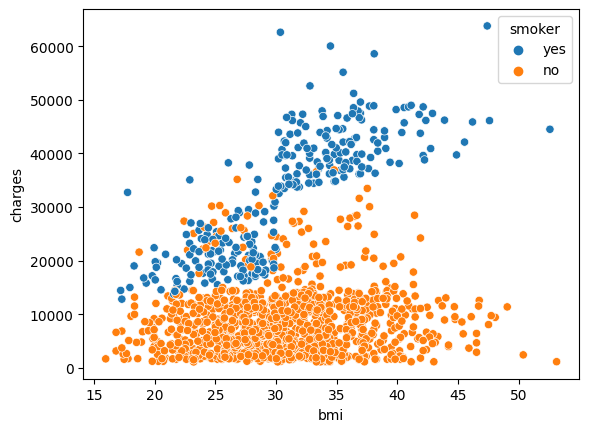

In [12]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])


This scatter plot shows that while nonsmokers to tend to pay slightly more with increasing BMI, smokers pay MUCH more.

To further emphasize this fact, we can use the sns.lmplot command to add two regression lines, corresponding to smokers and nonsmokers. (You'll notice that the regression line for smokers has a much steeper slope, relative to the line for nonsmokers!)

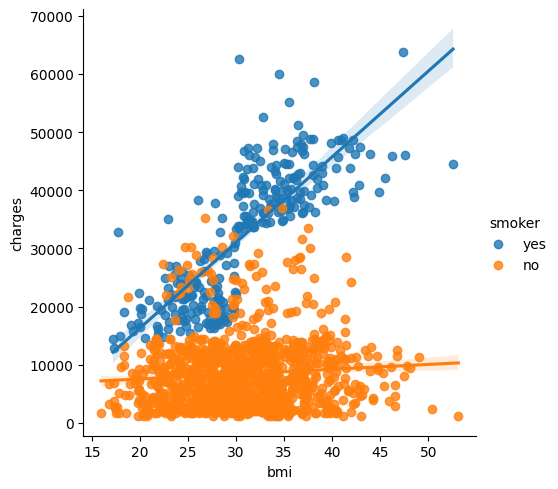

In [13]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)


The sns.lmplot command above works slightly differently than the commands you have learned about so far:

- Instead of setting x=insurance_data['bmi'] to select the 'bmi' column in in surance_data, we set x="bmi" to specify the name of the column only.
- Similarly, y="charges" and hue="smoker" also contain the names of columns.
- We specify the dataset with data=insurance_data.



Finally, there's one more plot that you'll learn about, that might look slightly different from how you're used to seeing scatter plots. Usually, we use scatter plots to highlight the relationship between two continuous variables (like "bmi" and "charges"). However, we can adapt the design of the scatter plot to feature a categorical variable (like "smoker") on one of the main axes. We'll refer to this plot type as a __categorical.scatter.plot__, and we build it with the sns.swarmplot command.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3543: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3543: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


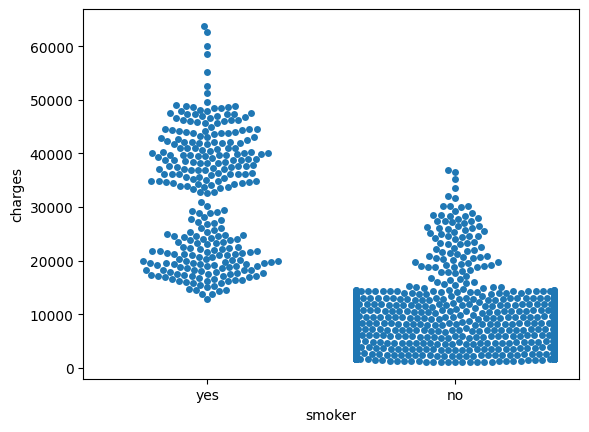

In [14]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

Among other things, this plot shows us that:

- on average, non-smokers are charged less than smokers, and
- the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers.

# Distributions

In this tutorial you'll learn all about histograms and density plots.

In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")


# Path of the file to read
iris_filepath = "/home/maciej/KURSY/Kaggle/pliki_pomoc/iris.csv"

# Read the file into a variable iris_data
iris_data = pd.read_csv(iris_filepath, index_col="Id")

# Print the first 5 rows of the data
iris_data.head()

Setup Complete


,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## histograms
Say we would like to create a histogram to see how petal length varies in iris flowers. We can do this with the sns.histplot command.

<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Count'>

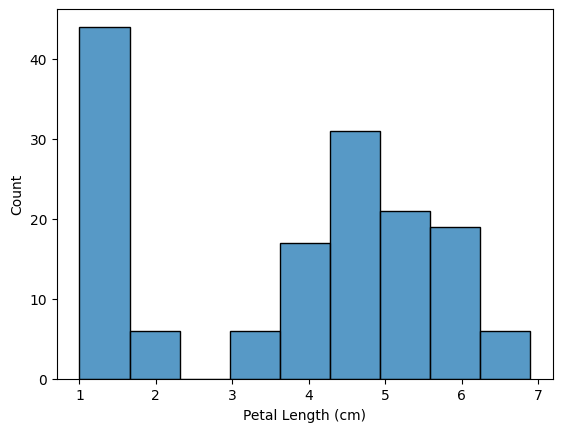

In [6]:
# Histogram 
sns.histplot(iris_data['Petal Length (cm)'])

In the code cell above, we had to supply the command with the column we'd like to plot (in this case, we chose 'Petal Length (cm)').

## Density plots

The next type of plot is a kernel density estimate (KDE) plot. In case you're not familiar with KDE plots, you can think of it as a smoothed histogram.

To make a KDE plot, we use the sns.kdeplot command. Setting shade=True colors the area below the curve (and data= chooses the column we would like to plot).

/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Density'>

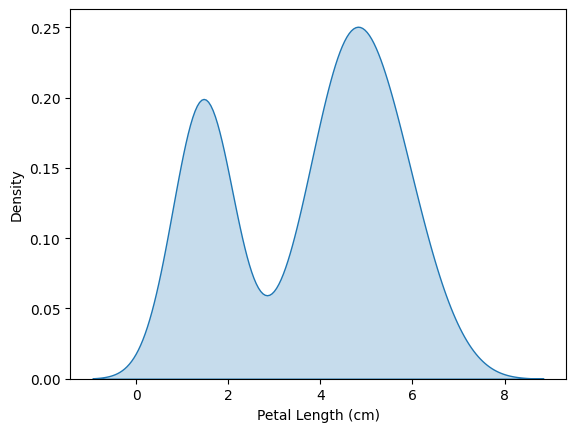

In [7]:
# KDE plot 
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

## 2D KDE plots


We're not restricted to a single column when creating a KDE plot. We can create a two-dimensional (2D) KDE plot with the sns.jointplot command.

In the plot below, the color-coding shows us how likely we are to see different combinations of sepal width and petal length, where darker parts of the figure are more likely.



In [ ]:
# 2D KDE plot
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde")


Note that in addition to the 2D KDE plot in the center,

- the curve at the top of the figure is a KDE plot for the data on the x-axis (in this case, iris_data['Petal Length (cm)']), and
- the curve on the right of the figure is a KDE plot for the data on the y-axis (in this case, iris_data['Sepal Width (cm)']).

## Color-coded plots

We can create three different histograms (one for each species) of petal length by using the sns.histplot command (as above).

- data= provides the name of the variable that we used to read in the data
- x= sets the name of column with the data we want to plot
- hue= sets the column we'll use to split the data into different histograms

# Choosing Plot Types and Custom Styles

In this course, you've learned how to create many different chart types. Now, you'll organize your knowledge, before learning some quick commands that you can use to change the style of your charts.

## Changing styles with seaborn

All of the commands have provided a nice, default style to each of the plots. However, you may find it useful to customize how your plots look, and thankfully, this can be accomplished by just adding one more line of code!

As always, we need to begin by setting up the coding environment. (This code is hidden, but you can un-hide it by clicking on the "Code" button immediately below this text, on the right.)

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

# Path of the file to read
spotify_filepath = "/home/maciej/KURSY/Kaggle/pliki_pomoc/spotify.csv"

# Read the file into a variable spotify_data
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)

# Line chart 
plt.figure(figsize=(12,6))
sns.lineplot(data=spotify_data)


Setup Complete


IsADirectoryError: [Errno 21] Is a directory: '/'